In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [95]:
img = cv2.imread('images/img_test.png',1)

In [96]:
#How many elements are in that data. 
print(img.size)

#What is the shape of the array.
print(img.shape)

#What type are the elements.
print(img.dtype)




1958682
(649, 1006, 3)
uint8


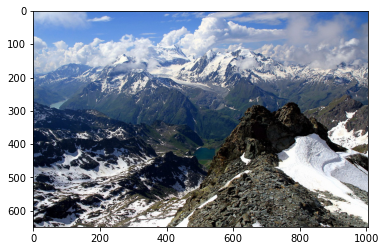

In [97]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [98]:
h = img.shape[0]
w = img.shape[1]
d = img.shape[2]

print(img[0][0][0])
# normalize first
img = img.astype("float32") / 255
print(img[0][0][0])



186
0.7294118


In [117]:
# Intialize Array for Blended Images
imgBlend = np.zeros((h,w,d))

In [100]:
print(imgBlend)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [79]:
imgBlend1 = np.ones((1,h,w,d)) 

In [80]:
print(imgBlend1.shape)


(1, 649, 1006, 3)


In [81]:
imgCombined = np.append(imgBlend, imgBlend1, axis=0)


In [103]:
imgCombined = np.empty((1,h,w,d), dtype=float)

In [125]:
imgCombined = []


In [126]:
print(imgCombined.shape)

AttributeError: 'list' object has no attribute 'shape'

In [127]:
# MULTIPLY
for alpha in np.arange(0,1,0.1):
    imgBlend = img
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
            
                # Apply Filter to seperate image. Each run through saves a blend image.  Keep the original sacred.
                imgBlend[y,x,z] = img[y,x,z] * img[y,x,z]

    # Add new blended image to imgCombined
    imgCombined.append(imgBlend)
            
imgCombined = np.asarray(imgCombined)

In [128]:
imgCombined = np.asarray(imgCombined)

In [129]:
print(imgCombined.shape)


(10, 649, 1006, 3)


In [55]:
#  SCREEN

# f(a,b)=1-(1-a)(1-b)

for y in range(0,h):
    #Search each pixel in the row. x = pixel
    for x in range(0,w):
        #Search each RGB value.
        for z in range(0,d):
          
            # Apply Filter
            img[y,x,z] = 1 - (1 - img[y,x,z]) * (1 - img[y,x,z])

In [56]:
# set back to integer
img = img * 255
img = img.astype(int)
print(img[0][0][0])

199


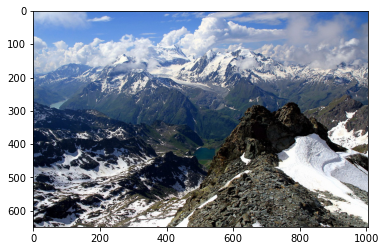

In [90]:

plt.imshow(img)